Please use the dataset provided for this problem (classification). The feature columns
are x0, x1, x2, . . . , x26 and the class column is y.
(a) Classify the dataset using Logistic regression and find summary statistics for important features. (Marks: 8)
(b) Also implement the LDA and QDA and evaluate the model performance. (Marks:
8)
(c) Implement stochastic gradient descent classifier from scratch (use appropriate loss
term for classification). Also report the best learning rate based on a hyperparameter search. (Marks: 24)


In [2]:
pip install pandas scikit-learn seaborn

Question # 2


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

from sklearn.linear_model import LogisticRegression

In [ ]:
# dataset = "./data/classification/ch24m571.csv"
# df = pd.read_csv(dataset)


In [4]:
dataset = "./ch24m571_classification.csv"
data = pd.read_csv(dataset)

df = data.copy(deep=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  target     1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [6]:
df.isnull().sum()

,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0


In [7]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.177282,0.024273,0.017031,0.033002,-0.013837,-0.031190,-0.062813,-0.000917,-0.006205,1.004212,0.482000
std,1.530263,1.008375,1.055607,1.591317,1.821614,0.981978,0.995962,1.464990,1.411333,1.459268,0.499926
min,-3.210298,-3.003120,-3.589345,-4.370126,-5.197710,-3.870659,-3.680671,-3.370769,-4.265371,-3.730325,0.000000
25%,-1.138156,-0.621590,-0.695737,-1.022583,-1.348478,-0.672369,-0.760763,-1.030733,-0.997061,-0.015804,0.000000
50%,0.343936,0.017047,0.000964,0.003129,-0.069996,-0.079404,-0.046466,-0.143326,0.385963,1.007328,0.000000
75%,1.477069,0.648759,0.738175,1.220610,1.250177,0.660455,0.578520,0.963853,1.050052,1.994456,1.000000
max,3.583239,2.876100,3.211231,4.895015,5.414044,2.915213,3.206138,4.542206,3.844896,5.845689,1.000000


In [8]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-2.571782,-0.775320,-0.230604,1.958645,-3.395607,1.522054,-0.377627,-0.155543,-2.005707,-0.665397,1
1,0.242795,-0.910081,-0.218772,0.353309,1.116301,1.171665,-0.868423,1.716526,0.101099,2.148361,1
2,1.342162,0.249209,2.526542,0.648054,1.317515,0.110978,-0.295429,-2.139163,0.665200,-0.314348,0
3,1.195117,-1.020043,0.088276,-1.791510,0.339573,-0.820464,-0.063201,-1.218362,1.817399,-0.370951,0
4,-2.881024,-1.109877,-0.483062,2.506584,-3.877937,-0.090600,-1.766709,-0.875614,-2.071011,-1.537336,1


In [10]:
# splitting data for features and targets

X = data.drop(columns=['target'])
y = data['target']

In [11]:
# usual train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [26]:
# Standardization

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# function to show the confusion matrix

def generate_result(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, cmap = 'Spectral', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()

In [27]:
# Training the logistic model

log_reg = LogisticRegression()   # added max_iteration
log_reg.fit(X_train_scaled, y_train)

y_score = log_reg.fit(X_train, y_train).predict_proba(X_test)




In [28]:
coefficients = log_reg.coef_[0] # we are taking the 1st element as the model has 9 features . this stores the weights and we take the first
# coefficient - thus we have coefficients for each features

important_features = np.argsort(np.abs(coefficients))[-3:]  # we take absolute values of each coefficient and sort them
# we take the last 3 features having the largest coefficients

important_feature_names = X.columns[important_features]  # taking the name of all the features


In [29]:
# Summary statistics for important features (before scaling)
summary_stats = data[important_feature_names].describe()

# Evaluate model performance
y_pred = log_reg.predict(X_test_scaled)
log_reg_report = classification_report(y_test, y_pred)



In [30]:
print("Important Feature Names:")
for feature_name in important_feature_names:
    print(f"- {feature_name}")

print("----------------------------------------")

print("\nSummary Statistics for Important Features:")
display(summary_stats)

print("----------------------------------------")

print("\nLogistic Regression Classification Report:")
print(log_reg_report)

Important Feature Names:
- feature_0
- feature_3
- feature_7
----------------------------------------

Summary Statistics for Important Features:


,feature_0,feature_3,feature_7
count,1000.000000,1000.000000,1000.000000
mean,0.177282,0.033002,-0.000917
std,1.530263,1.591317,1.464990
min,-3.210298,-4.370126,-3.370769
25%,-1.138156,-1.022583,-1.030733
50%,0.343936,0.003129,-0.143326
75%,1.477069,1.220610,0.963853
max,3.583239,4.895015,4.542206


----------------------------------------

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       104
           1       0.92      0.97      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



o implement the LDA and QDA and evaluate the model performance.

The accuracy for Linear Discriminant Analysis is: 94.5 %

The classification report for LDA is:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       104
           1       0.92      0.97      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



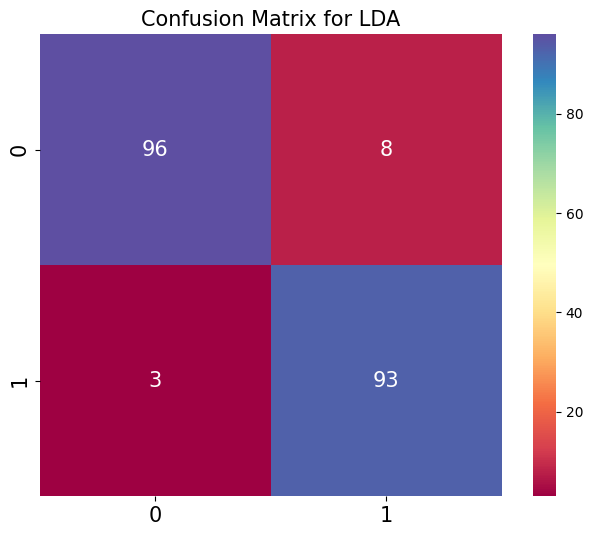

In [31]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred = lda.predict(X_test_scaled)
acc_lda = lda.score(X_test_scaled, y_test)
print('The accuracy for Linear Discriminant Analysis is:', acc_lda * 100, '%')
generate_result(lda, y_pred, 'LDA')

The accuracy for Quadratic Discriminant Analysis is: 94.5 %

The classification report for QDA is:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       104
           1       0.92      0.97      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


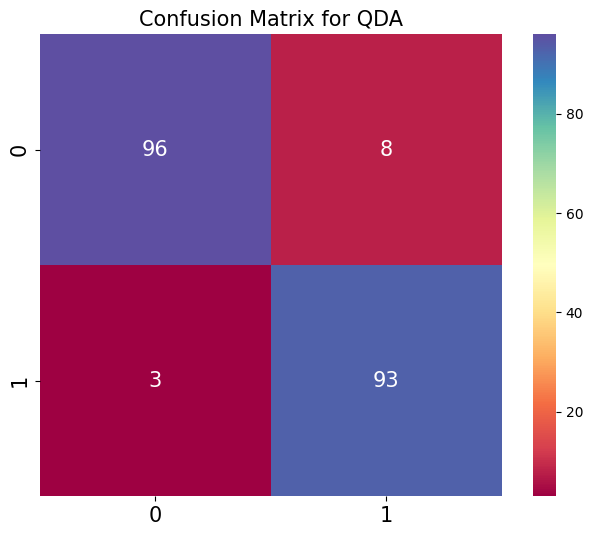

In [34]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
y_pred = qda.predict(X_test_scaled)
acc_qda = qda.score(X_test_scaled, y_test)
print('The accuracy for Quadratic Discriminant Analysis is:', acc_qda * 100, '%')
generate_result(qda, y_pred, 'QDA')


Implement stochastic gradient descent classifier from scratch (use appropriate loss
term for classification). Also report the best learning rate based on a hyperparameter search.

In [35]:
# Defining the sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [40]:
# Defining the Log-loss function
def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))


In [36]:
# SGD implementation from scratch
def sgd_classifier(X, y, learning_rate=0.01, epochs=1000):
    np.random.seed(42)
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(n_samples):
            # Randomly select a sample
            idx = np.random.randint(0, n_samples)
            x_i = X[idx]
            y_i = y[idx]

            # Prediction and error
            linear_output = np.dot(x_i, weights) + bias
            y_pred = sigmoid(linear_output)
            error = y_pred - y_i

            # Update weights and bias
            weights -= learning_rate * error * x_i
            bias -= learning_rate * error

    return weights, bias

In [38]:
# Prepare data for SGD
X_train_np = X_train_scaled
y_train_np = y_train.to_numpy()

In [41]:

# Hyperparameter search for best learning rate
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
best_lr = 0
best_loss = float('inf')

for lr in learning_rates:
    weights, bias = sgd_classifier(X_train_np, y_train_np, learning_rate=lr, epochs=500)
    y_pred_train = sigmoid(np.dot(X_train_np, weights) + bias)
    train_loss = log_loss(y_train_np, y_pred_train)

    if train_loss < best_loss:
        best_loss = train_loss
        best_lr = lr

print(f"Best learning rate is : {best_lr}")
print(f"Best loss is : {best_loss}")



(0.001, 0.22522904841665223)